##  Import libraries

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

##  Import dataset

In [310]:
df = pd.read_csv('school-grades.csv') 

In [311]:
print("Total number of students: ", len(df))

Total number of students:  649


In [312]:
df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [313]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [314]:
df.info()    # Information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [315]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [316]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [317]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


## Data Visualization

### Student's Sex 

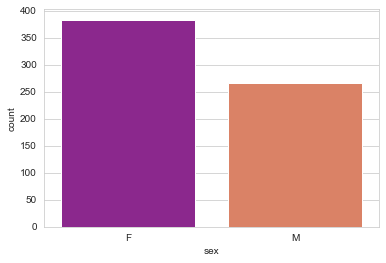

In [321]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=df,palette='plasma')

- The gender distribution is pretty even.

### Age of Students

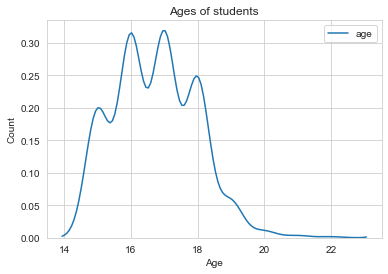

In [322]:
b = sns.kdeplot(df['age'])    # Kernel Density Estimations
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

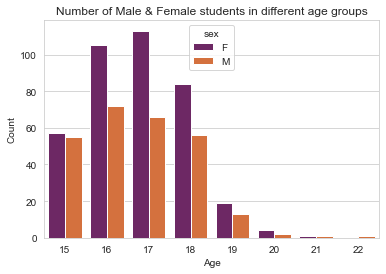

In [323]:
b = sns.countplot(x='age',hue='sex', data=df, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

- The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.
- The age group above 19 may be outliers, year back students or droupouts.

### Students from Urban & Rural Areas

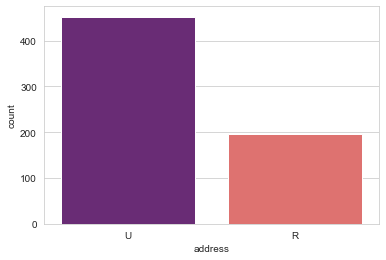

In [324]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=df,palette='magma')    # urban & rural representaion on countplot

- Approximately 77.72% students come from urban region and 22.28% from rural region.

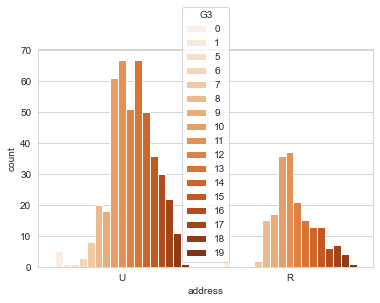

In [326]:
sns.countplot(x='address',hue='G3',data=df,palette='Oranges')

# EDA - Exploratory Data Analysis

### 1. Does age affect final grade?

Text(0.5, 1.0, 'Age vs Final Grade')

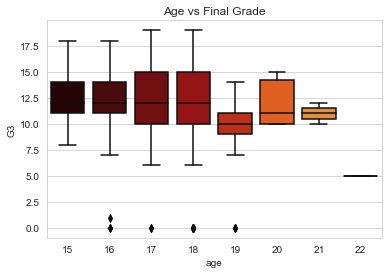

In [328]:
b= sns.boxplot(x='age', y='G3',data=df ,palette='gist_heat')
b.axes.set_title('Age vs Final Grade')

- Plotting the distribution rather than statistics would help us better understand the data.
- The above plot shows that the median grades of the three age groups(15,16,17) are similar. Note the skewness of age group 19. (may be due to sample size). Age group 20 seems to score highest grades among all.

Text(0.5, 1.0, 'Does age affect final grade?')

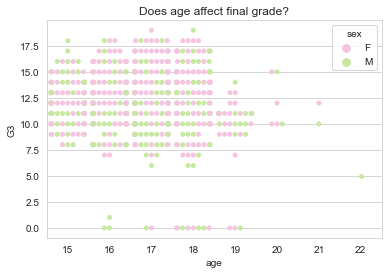

In [329]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df ,palette='PiYG')
b.axes.set_title('Does age affect final grade?')

## 2. Do urban students perform better than rural students?

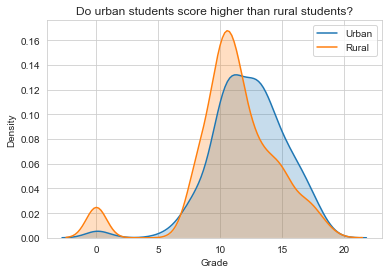

In [330]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

- The above graph clearly shows there is not much difference between the grades based on location.

### Failure Attribute

Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

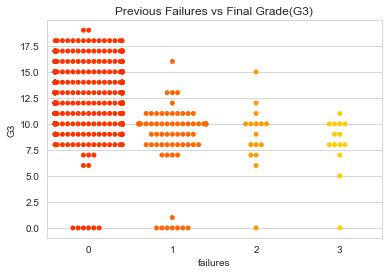

In [333]:
b = sns.swarmplot(x=df['failures'],y=df['G3'],palette='autumn')
b.axes.set_title('Previous Failures vs Final Grade(G3)')

**Observation :** Student with less previous failures usually score higher

### Family Education Attribute ( Fedu + Medu )

Text(0.5, 1.0, 'Family Education vs Final Grade(G3)')

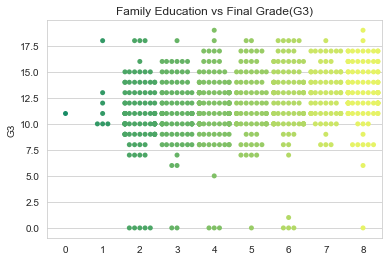

In [334]:
fa_edu = df['Fedu'] + df['Medu']
b = sns.swarmplot(x=fa_edu,y=df['G3'],palette='summer')
b.axes.set_title('Family Education vs Final Grade(G3)')

**Observation :** Educated families result in higher grades

### Wish to go for Higher Education Attribute

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

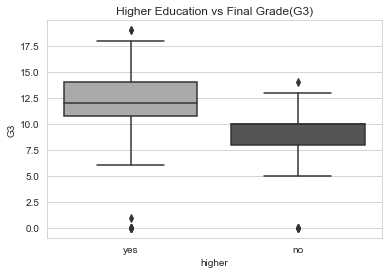

In [336]:
b = sns.boxplot(x=df['higher'],y=df['G3'],palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')

**Observation :** Students who wish to go for higher studies score more

## Going Out with Friends Attribute

Text(0.5, 1.0, 'Go Out ')

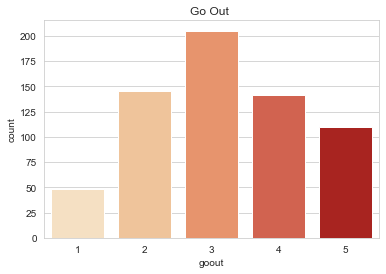

In [339]:
b = sns.countplot(x=df['goout'],palette='OrRd')
b.axes.set_title('Go Out ')

In [341]:
**Observation :** The students have an average score when it comes to going out with friends.

SyntaxError: invalid syntax (<ipython-input-341-156ff4f7082f>, line 1)

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

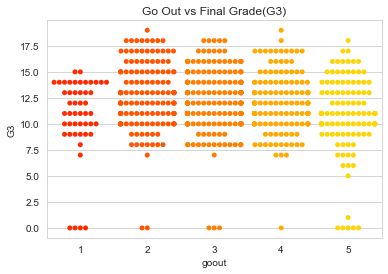

In [340]:
b = sns.swarmplot(x=df['goout'],y=df['G3'],palette='autumn')
b.axes.set_title('Go Out vs Final Grade(G3)')

**Observation :** Students who go out a lot score less

### Romantic relationship Attribute

Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

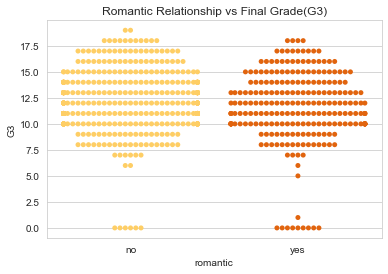

In [342]:
b = sns.swarmplot(x=df['romantic'],y=df['G3'],palette='YlOrBr')
b.axes.set_title('Romantic Relationship vs Final Grade(G3)')

**Observation :** Students with no romantic relationship score higher

### Reason Attribute

Text(0.5, 1.0, 'Reason vs Students Count')

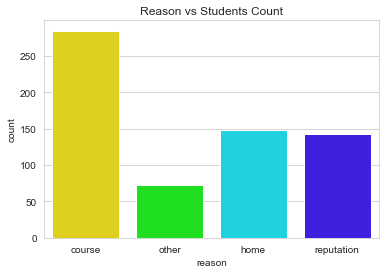

In [343]:
b = sns.countplot(x='reason',data=df,palette='gist_rainbow')    # Reason to choose this school
b.axes.set_title('Reason vs Students Count')

Text(0.5, 1.0, 'Reason vs Final grade')

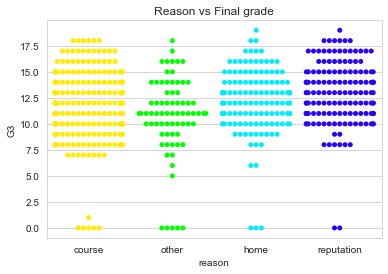

In [344]:
b = sns.swarmplot(x='reason', y='G3', data=df,palette='gist_rainbow')
b.axes.set_title('Reason vs Final grade')

**Observation :** The students have an equally distributed average score when it comes to reason attribute.

## Selection of input variables
- There are two problem which we need to consider. The first is correlation and the second one is collinearity.

    - Correlation between variables describe the relationship between two variables. If they are extremely correlated, then they are collinear. Autocorrelation occurs when a variable’s data affects another instance of that same variable (same column, different row). Linear regression only works if there is little or no autocorrelation in the dataset, and each instance is independent of each other.
    - Multicollinearity exists when two or more of the predictors (x variables) in a regression model are moderately or highly correlated (different column). When one of our predictors is able to strongly predict another predictor or have weird relationships with each other (maybe x2 = x3 or x2 = 2(x3) + x4), then your regression equation is going to be a mess.

- In this section, I visualize corellation matrix to view relationship between continuous variables

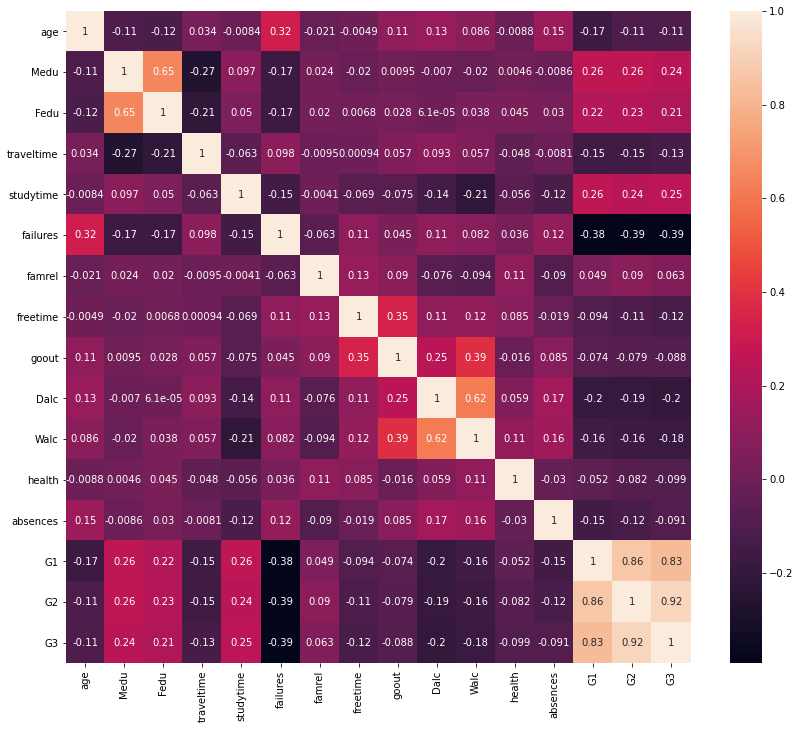

In [318]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot= True)
plt.show()

- With above correlation maxtrix, you can see there are no dependent variables. Thus, we don't need to eliminate independent variables which are used for regression. And the rest should be used for classification.
- I conduct an experiment using all category variables as a dummy variables, and all numerical variables.

#  Preprocessing

## Checking for missing values

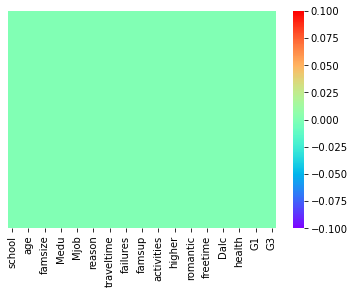

In [304]:
sns.heatmap(df.isnull(),cmap="rainbow",yticklabels=False)    # To check any null values present in dataset pictorially

In [99]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

- There are no null values in the given dataset

## Encoding

In [100]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [101]:
object_columns = [df.columns[index] for index, dtype in enumerate(df.dtypes) if dtype == 'object']
object_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [102]:
for object_column in object_columns:
    print(f" {object_column}: {df[object_column].unique()}")

 school: ['GP' 'MS']
 sex: ['F' 'M']
 address: ['U' 'R']
 famsize: ['GT3' 'LE3']
 Pstatus: ['A' 'T']
 Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
 Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
 reason: ['course' 'other' 'home' 'reputation']
 guardian: ['mother' 'father' 'other']
 schoolsup: ['yes' 'no']
 famsup: ['no' 'yes']
 paid: ['no' 'yes']
 activities: ['no' 'yes']
 nursery: ['yes' 'no']
 higher: ['yes' 'no']
 internet: ['no' 'yes']
 romantic: ['no' 'yes']


#### encoding for binary values ---- hot encoding for more than 2 values

In [104]:
df['Mjob'] = df['Mjob'].apply(lambda x: "m_" + x)
df['Fjob'] = df['Fjob'].apply(lambda x: "f_" + x)
df['reason'] = df['reason'].apply(lambda x: "r_" + x)
df['guardian'] = df['guardian'].apply(lambda x: "g_" + x)

In [105]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,m_services,f_other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,m_teacher,f_services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,m_other,f_other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,2,4,5,3,4,2,6,10,10,10


In [110]:
dummies = pd.concat([pd.get_dummies(df['Mjob']),
                     pd.get_dummies(df['Fjob']),
                     pd.get_dummies(df['reason']),
                     pd.get_dummies(df['guardian'])] , axis=1)


In [111]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
645,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
646,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
647,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [112]:
df= pd.concat([df, dummies], axis = 1)

In [113]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,m_services,f_other,...,1,0,0,1,0,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,m_teacher,f_services,...,0,1,0,1,0,0,0,0,1,0
646,MS,F,18,U,GT3,T,1,1,m_other,f_other,...,1,0,0,1,0,0,0,0,1,0
647,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,0,1,0,1,0,0,0,0,1,0


In [116]:
df.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace= True)

In [117]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
646,MS,F,18,U,GT3,T,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
647,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [118]:
object_columns = [df.columns[index] for index, dtype in enumerate(df.dtypes) if dtype == 'object']
for object_column in object_columns:
    print(f" {object_column}: {df[object_column].unique()}")

 school: ['GP' 'MS']
 sex: ['F' 'M']
 address: ['U' 'R']
 famsize: ['GT3' 'LE3']
 Pstatus: ['A' 'T']
 schoolsup: ['yes' 'no']
 famsup: ['no' 'yes']
 paid: ['no' 'yes']
 activities: ['no' 'yes']
 nursery: ['yes' 'no']
 higher: ['yes' 'no']
 internet: ['no' 'yes']
 romantic: ['no' 'yes']


In [119]:
encoder= LabelEncoder()
for object_column in object_columns:
    df[object_column]= encoder.fit_transform(df[object_column])

In [120]:
df.dtypes

school          int32
sex             int32
age             int64
address         int32
famsize         int32
Pstatus         int32
Medu            int64
Fedu            int64
traveltime      int64
studytime       int64
failures        int64
schoolsup       int32
famsup          int32
paid            int32
activities      int32
nursery         int32
higher          int32
internet        int32
romantic        int32
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
m_at_home       uint8
m_health        uint8
m_other         uint8
m_services      uint8
m_teacher       uint8
f_at_home       uint8
f_health        uint8
f_other         uint8
f_services      uint8
f_teacher       uint8
r_course        uint8
r_home          uint8
r_other         uint8
r_reputation    uint8
g_father        uint8
g_mother        uint8
g_other   

In [154]:
Y = df['G3']
X = df.drop('G3' , axis=1)

In [155]:
Y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [156]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
645,1,0,18,1,1,1,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
646,1,0,18,1,0,1,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
647,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


## Scaling

In [157]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [158]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.730944,-0.833377,1.031695,0.660182,-0.648175,-2.666927,1.310216,1.540715,0.576718,0.083653,...,-1.140797,-0.621894,4.126473,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
1,-0.730944,-0.833377,0.210137,0.660182,-0.648175,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,1.800508,-1.531457,-0.259681
2,-0.730944,-0.833377,-1.432980,0.660182,1.542792,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,-0.884854,-0.545894,2.830881,-0.53161,-0.555399,0.652973,-0.259681
3,-0.730944,-0.833377,-1.432980,0.660182,-0.648175,0.374963,1.310216,-0.278983,-0.760032,1.290114,...,-1.140797,1.607991,-0.242338,-0.884854,1.831858,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
4,-0.730944,-0.833377,-0.611422,0.660182,-0.648175,0.374963,0.428131,0.630866,-0.760032,0.083653,...,0.876580,-0.621894,-0.242338,-0.884854,1.831858,-0.353247,-0.53161,1.800508,-1.531457,-0.259681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.368094,-0.833377,1.853254,-1.514733,-0.648175,0.374963,-0.453954,0.630866,-0.760032,1.290114,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
645,1.368094,-0.833377,1.031695,0.660182,1.542792,0.374963,0.428131,-1.188832,-0.760032,0.083653,...,-1.140797,1.607991,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
646,1.368094,-0.833377,1.031695,0.660182,-0.648175,0.374963,-1.336039,-1.188832,0.576718,0.083653,...,0.876580,-0.621894,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681
647,1.368094,1.199937,0.210137,0.660182,1.542792,0.374963,0.428131,-1.188832,0.576718,-1.122808,...,-1.140797,1.607991,-0.242338,1.130130,-0.545894,-0.353247,-0.53161,-0.555399,0.652973,-0.259681


## Training

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , train_size=0.7)

In [209]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((454, 45), (195, 45), (454,), (195,))

In [210]:
model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Predicting the value

In [211]:
predictions = model.predict(X_test)

In [255]:
len(predictions)

195

### Comparing Actual vs Predicted

In [281]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
91,13,13.225200
202,14,14.034282
14,15,14.551635
419,11,10.994731
381,15,15.149882
...,...,...
428,9,7.489482
332,18,18.837382
147,14,14.590800
508,9,9.304912


## Result

In [216]:
X_real = np.linspace(0,20,100)
Y_real = X_real

Text(0, 0.5, 'Predicted values')

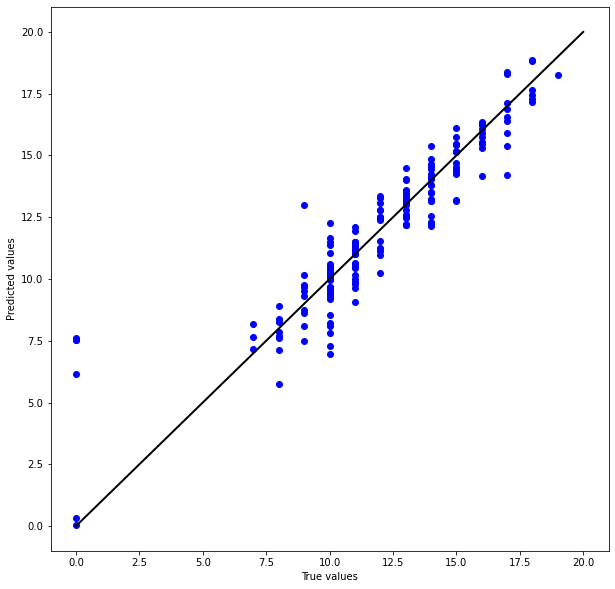

In [242]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,predictions, c='b')
plt.plot(X_real, Y_real, c='black', linewidth=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')

## Evaluation

#### Coefficient of Determination or R^2


###### The closer its value to one, the better your model is

In [246]:
print("The R^2 for the Dataset in train is: ", model.score(X_train,Y_train))

print("The R^2 for the Dataset in test is: ", model.score(X_test,Y_test))

The R^2 for the Dataset in train is:  0.866164223271532
The R^2 for the Dataset in test is:  0.830652407866329


#### Root Mean Square  Error(RMSE)

###### it is always non-negative, and values closer to zero are better.


In [248]:
MSE= np.sqrt(mean_squared_error(Y_test, predictions))

In [251]:
print("The Root Mean Squared Error for the Dataset is: ", MSE)

The Root Mean Squared Error for the Dataset is:  1.3907780124630802
